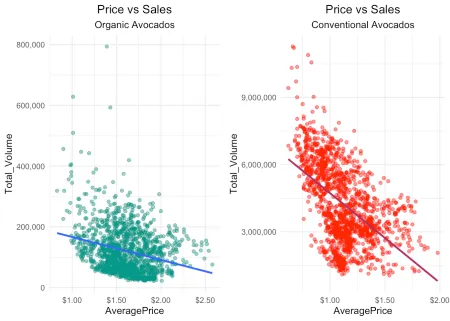 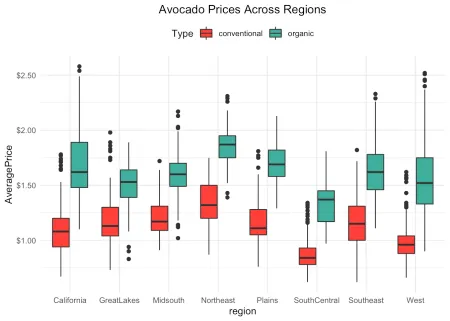

## Prediction with FB Prophet
- This is a price prediction project using FB Prophet, an open source tool used in Time Series Forecasting.
- FB Prophet is known for its accuracy and forecasting simplicity. 
- A procedure for forecasting time series data based on an additive model where non-linear trends are  fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data.
- It is an additive regression model with a piecewise linear or logistic growth curve trend. It includes a yearly seasonal component modeled using Fourier series and a weekly seasonal component modeled using dummy variables.

## Import Libraries

In [1]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import fbprophet
import random
import seaborn as sns
from fbprophet import Prophet

import warnings
warnings.simplefilter("ignore")

## Import Data

In [2]:
avocado_df = pd.read_csv('../input/avocado-prices-2020/avocado-updated-2020.csv')

## Exploratory Data Analysis 

In [3]:
avocado_df.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


In [4]:
# View the last elements in the training dataset
avocado_df.tail(10)

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
33035,2020-11-29,0.95,72128.91,6789.51,31201.09,627.87,33510.44,20587.54,11866.23,1056.67,conventional,2020,Syracuse
33036,2020-11-29,1.46,3191.59,166.36,89.78,0.00,2935.45,2618.57,316.88,0.00,organic,2020,Syracuse
33037,2020-11-29,0.65,562437.35,230468.94,15289.83,44.60,316633.98,251658.97,64927.71,47.30,conventional,2020,Tampa
33038,2020-11-29,0.95,11883.88,101.71,0.00,0.00,11782.17,11782.17,0.00,0.00,organic,2020,Tampa
33039,2020-11-29,0.89,36303871.76,10341275.25,6001923.10,530410.90,19371480.05,12667978.20,6230121.49,473380.36,conventional,2020,Total U.S.
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico
33044,2020-11-29,1.35,24106.58,1236.96,617.80,1564.98,20686.84,17824.52,2862.32,0.00,organic,2020,West Tex/New Mexico


In [5]:
# brief statistics
avocado_df.describe()

,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,year
count,33045.000000,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,33045.000000
mean,1.379941,9.683997e+05,3.023914e+05,2.797693e+05,2.148255e+04,3.646735e+05,2.501980e+05,1.067329e+05,7.742585e+03,2017.460887
std,0.378972,3.934533e+06,1.301026e+06,1.151052e+06,1.001607e+05,1.564004e+06,1.037734e+06,5.167226e+05,4.819803e+04,1.699747
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2015.000000
25%,1.100000,1.511895e+04,7.673100e+02,2.712470e+03,0.000000e+00,9.121860e+03,6.478630e+03,4.662900e+02,0.000000e+00,2016.000000
50%,1.350000,1.291170e+05,1.099477e+04,2.343600e+04,1.780900e+02,5.322224e+04,3.687699e+04,6.375860e+03,0.000000e+00,2017.000000
75%,1.620000,5.058285e+05,1.190219e+05,1.352389e+05,5.096530e+03,1.744314e+05,1.206624e+05,4.041723e+04,8.044400e+02,2019.000000
max,3.250000,6.371614e+07,2.274362e+07,2.047057e+07,2.546439e+06,3.168919e+07,2.055041e+07,1.332760e+07,1.403184e+06,2020.000000


In [6]:
avocado_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33045 entries, 0 to 33044
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           33045 non-null  object 
 1   average_price  33045 non-null  float64
 2   total_volume   33045 non-null  float64
 3   4046           33045 non-null  float64
 4   4225           33045 non-null  float64
 5   4770           33045 non-null  float64
 6   total_bags     33045 non-null  float64
 7   small_bags     33045 non-null  float64
 8   large_bags     33045 non-null  float64
 9   xlarge_bags    33045 non-null  float64
 10  type           33045 non-null  object 
 11  year           33045 non-null  int64  
 12  geography      33045 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 3.3+ MB


In [7]:
# inquire if the data contains null elements in the dataset
avocado_df.isnull().sum()

date             0
average_price    0
total_volume     0
4046             0
4225             0
4770             0
total_bags       0
small_bags       0
large_bags       0
xlarge_bags      0
type             0
year             0
geography        0
dtype: int64

In [8]:
# sort values based on Date column
avocado_df = avocado_df.sort_values('date')

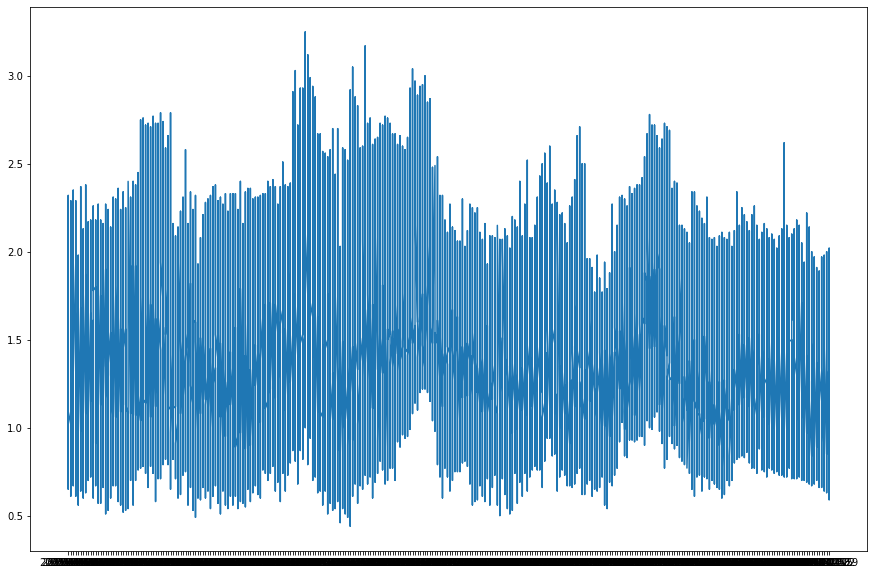

In [9]:
# Plot date and average price
plt.figure(figsize = (15,10))
plt.plot(avocado_df['date'], avocado_df['average_price'])

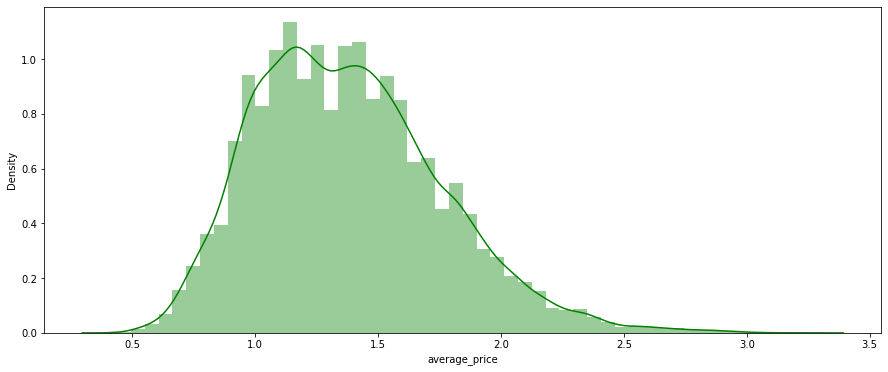

In [10]:
# Plot distribution of the average price
plt.figure(figsize=(15,6))
sns.distplot(avocado_df['average_price'], color='green');

<AxesSubplot:xlabel='type', ylabel='average_price'>

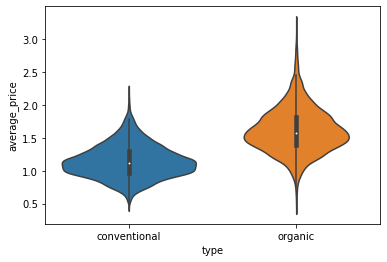

In [11]:
# Plot a violin plot of the average price vs. avocado type
sns.violinplot(x='type', y='average_price', data=avocado_df)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Roanoke'),
  Text(2, 0, 'Richmond/Norfolk'),
  Text(3, 0, 'Raleigh/Greensboro'),
  Text(4, 0, 'Portland'),
  Text(5, 0, 'Plains'),
  Text(6, 0, 'Pittsburgh'),
  Text(7, 0, 'Phoenix/Tucson'),
  Text(8, 0, 'Philadelphia'),
  Text(9, 0, 'Orlando'),
  Text(10, 0, 'Northern New England'),
  Text(11, 0, 'Northeast'),
  Text(12, 0, 'New York'),
  Text(13, 0, 'Sacramento'),
  Text(14, 0, 'San Diego'),
  Text(15, 0, 'West Tex/New Mexico'),
  Text(16, 0, 'West'),
  Text(17, 0, 'Total U.S.'),
  Text(18, 0, 'Tampa'),
  Text(19, 0, 'Syracuse'),
  Text(20, 0, 'St. Louis'),
  Text(21, 0, 'New Orleans/Mobile'),
  Text(22, 0, 'Spokane'),
  Text(23, 0, 'Southeast'),
  Text(24, 0, 'South Central'),
  Text(25, 0, 'South Ca

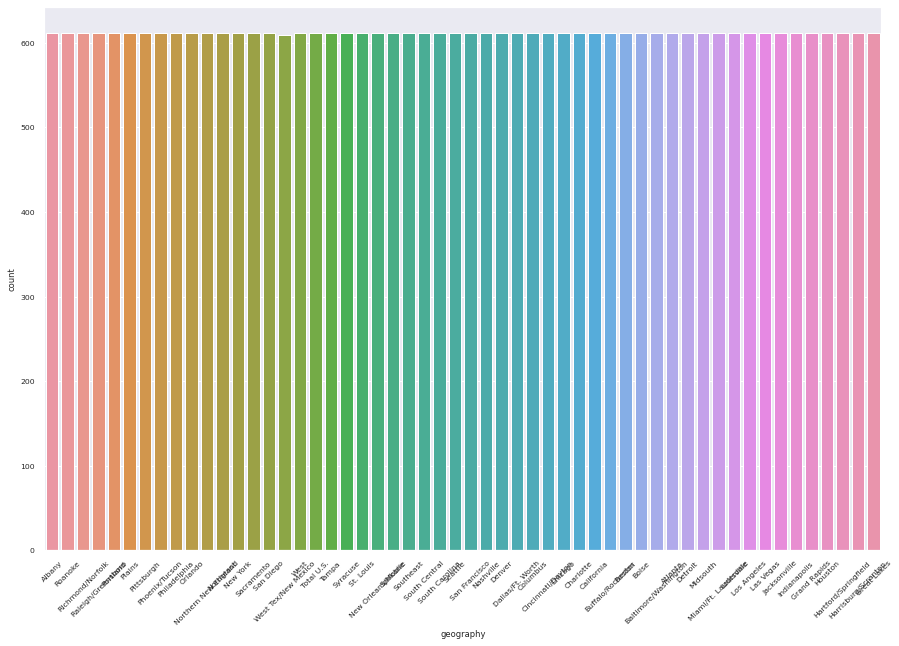

In [12]:
# Bar Chart to indicate the number of regions 

sns.set(font_scale=0.7) 
plt.figure(figsize=[15,10])
sns.countplot(x = 'geography', data = avocado_df)
plt.xticks(rotation = 45)


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '2015'),
  Text(1, 0, '2016'),
  Text(2, 0, '2017'),
  Text(3, 0, '2018'),
  Text(4, 0, '2019'),
  Text(5, 0, '2020')])

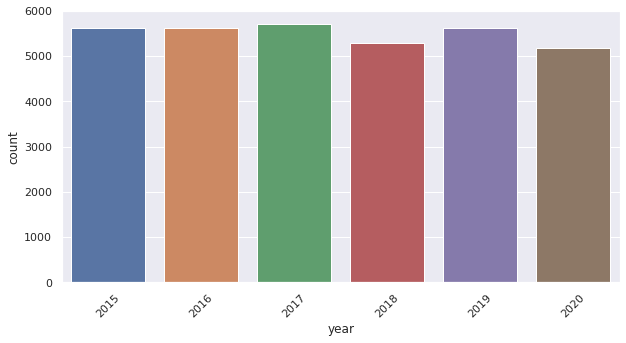

In [13]:
# Bar Chart to indicate the count in every year
sns.set(font_scale=1.0) 
plt.figure(figsize=[10,5])
sns.countplot(x = 'year', data = avocado_df)
plt.xticks(rotation = 45)

In [14]:
# Create dataframe for FB Prophet
avocado_prophet_df = avocado_df[['date', 'average_price']] 

In [15]:
avocado_prophet_df

,date,average_price
0,2015-01-04,1.22
78,2015-01-04,1.13
77,2015-01-04,1.54
76,2015-01-04,1.13
75,2015-01-04,2.01
...,...,...
32966,2020-11-29,1.20
32965,2020-11-29,1.21
32964,2020-11-29,1.36
32975,2020-11-29,0.78


In [16]:
# Rename columns required in FB Prophet
avocado_prophet_df = avocado_prophet_df.rename(columns={'date':'ds', 'average_price':'y'})

In [17]:
avocado_prophet_df

,ds,y
0,2015-01-04,1.22
78,2015-01-04,1.13
77,2015-01-04,1.54
76,2015-01-04,1.13
75,2015-01-04,2.01
...,...,...
32966,2020-11-29,1.20
32965,2020-11-29,1.21
32964,2020-11-29,1.36
32975,2020-11-29,0.78


## Modeling and Prediction

In [18]:
m = Prophet()
m.fit(avocado_prophet_df)

In [19]:
# Apply Predict
future = m.make_future_dataframe(periods=365)
prediction = m.predict(future)

In [20]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.315116,0.910313,1.814512,1.315116,1.315116,0.032107,0.032107,0.032107,0.144260,0.144260,0.144260,-0.112152,-0.112152,-0.112152,0.0,0.0,0.0,1.347223
1,2015-01-11,1.310845,0.913040,1.782690,1.310845,1.310845,0.041737,0.041737,0.041737,0.144260,0.144260,0.144260,-0.102522,-0.102522,-0.102522,0.0,0.0,0.0,1.352583
2,2015-01-18,1.306575,0.899660,1.791315,1.306575,1.306575,0.039318,0.039318,0.039318,0.144260,0.144260,0.144260,-0.104941,-0.104941,-0.104941,0.0,0.0,0.0,1.345893
3,2015-01-25,1.302305,0.837811,1.817434,1.302305,1.302305,0.021532,0.021532,0.021532,0.144260,0.144260,0.144260,-0.122728,-0.122728,-0.122728,0.0,0.0,0.0,1.323837
4,2015-02-01,1.298034,0.854973,1.715437,1.298034,1.298034,-0.000671,-0.000671,-0.000671,0.144260,0.144260,0.144260,-0.144930,-0.144930,-0.144930,0.0,0.0,0.0,1.297364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,2021-11-25,0.830424,0.151039,1.328907,0.482696,1.181673,-0.054385,-0.054385,-0.054385,-0.049898,-0.049898,-0.049898,-0.004487,-0.004487,-0.004487,0.0,0.0,0.0,0.776040
667,2021-11-26,0.829878,0.175142,1.368919,0.481459,1.181966,-0.057633,-0.057633,-0.057633,-0.049898,-0.049898,-0.049898,-0.007735,-0.007735,-0.007735,0.0,0.0,0.0,0.772245
668,2021-11-27,0.829332,0.148693,1.334745,0.480322,1.182217,-0.061196,-0.061196,-0.061196,-0.049898,-0.049898,-0.049898,-0.011298,-0.011298,-0.011298,0.0,0.0,0.0,0.768136
669,2021-11-28,0.828786,0.396376,1.557863,0.476798,1.182412,0.129101,0.129101,0.129101,0.144260,0.144260,0.144260,-0.015158,-0.015158,-0.015158,0.0,0.0,0.0,0.957887


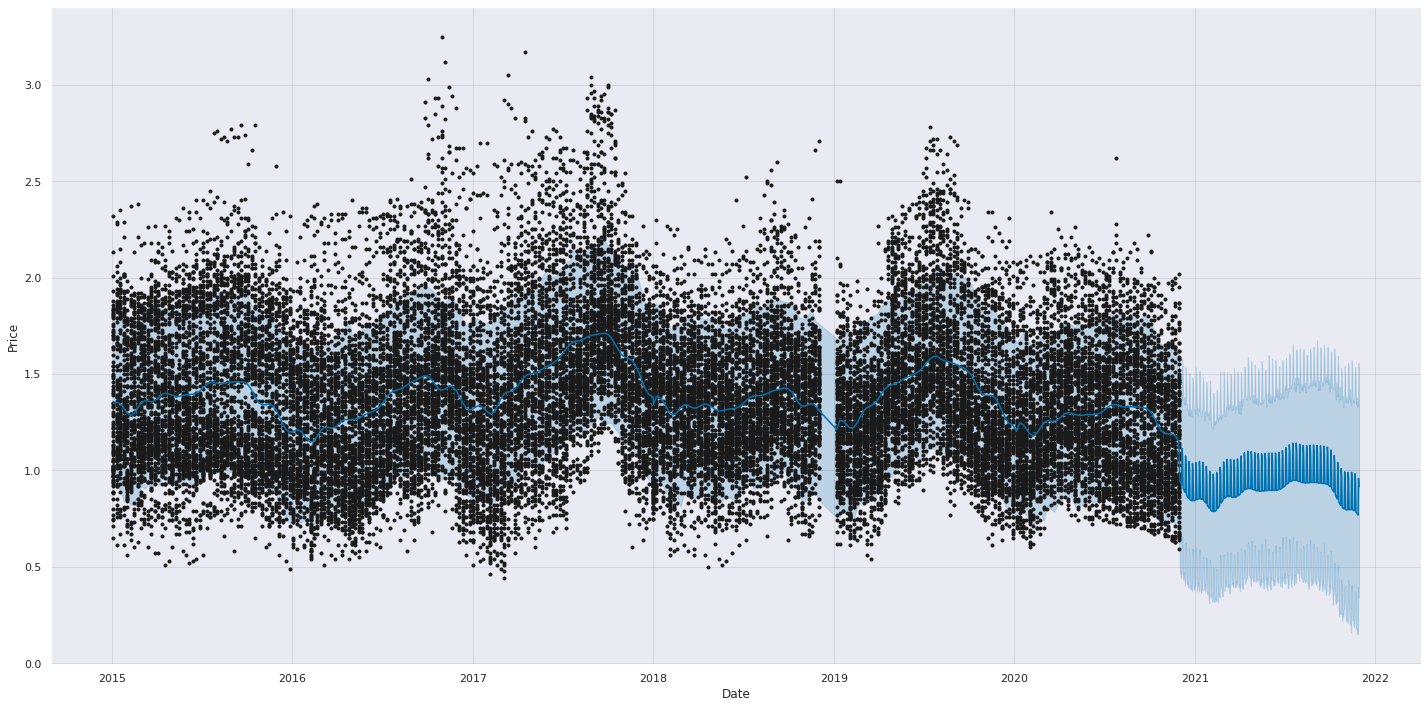

In [21]:
figure = m.plot(prediction, xlabel='Date', ylabel='Price', figsize=(20,10))

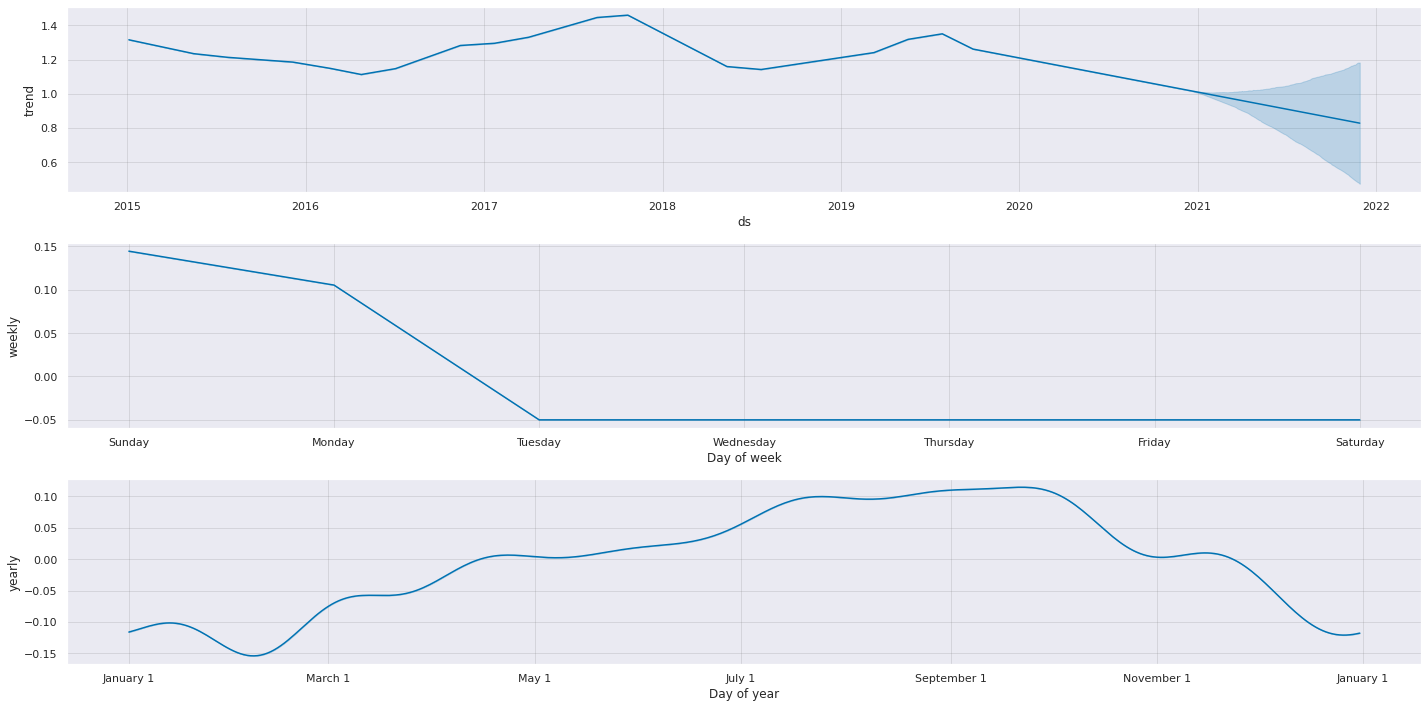

In [22]:
# Visualize prediction in certain periods
figure2 =  m.plot_components(prediction, figsize = (20,10))
